[[128 128]
 [128 128]
 [128 128]
 ...
 [128 128]
 [128 128]
 [128 128]]
8000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(23493, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  # This is added back by InteractiveShellApp.init_path()


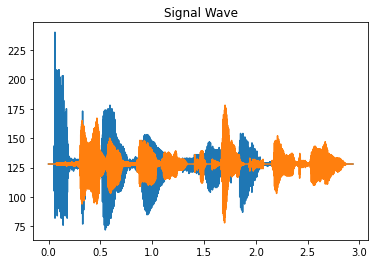

[[9215 9215]
 [9215 9215]
 [9215 9215]
 ...
 [9215 9215]
 [9215 9215]
 [9215 9215]]


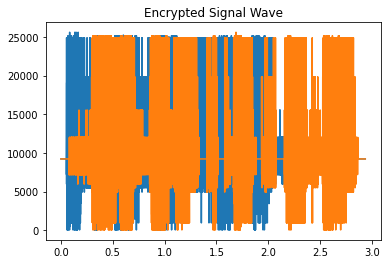


 Total time taken from your life:  0.6846837997436523 sec


In [3]:
import scipy.io.wavfile
import numpy
import time
import matplotlib.pyplot as plt
import sys

start = time.time()

#Encryption

fs, data = scipy.io.wavfile.read('/content/8bitaudio.wav')
print(data)
print(fs)
print(type(data))
dataarray = data
print(type(dataarray))
a, b = dataarray.shape
tup = (a, b)
data = data.astype(numpy.int16)
#data = numpy.asarray(data, dtype=numpy.int16)
#print(data.flags)
data.setflags(write=1)
#print(data.flags)
print((a,b))

Time= numpy.linspace(0, len(data)/fs, num=len(data))
plt.figure(1)
plt.title('Signal Wave')
plt.plot(Time, data) 
plt.show()
for i in range(0, tup[0]):
	for j in range(0, tup[1]):
		x = data[i][j] 
		x = ((pow(x,3)) % 25777)
		data[i][j] = x

print(data)
data = data.astype(numpy.int16)
scipy.io.wavfile.write('EN.wav', fs, data)

Time= numpy.linspace(0, len(data)/fs, num=len(data))
plt.figure(2)
plt.title('Encrypted Signal Wave')
plt.plot(Time, data) 
plt.show()

end = time.time()
ElspTime = (end-start)
print('\n Total time taken from your life: ', +ElspTime, 'sec')

In [4]:
import scipy.io.wavfile
import numpy
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import sys

start = time.time()

#Decryption

fs, data = scipy.io.wavfile.read('/content/EN.wav')
print(data)
print(fs)
print(type(data))
dataarray = data
print(type(dataarray))
a1, b1 = dataarray.shape
tup1 = (a1, b1)
data = data.astype(numpy.int16)
#print(data.flags)
data.setflags(write=1)
#print(data.flags)
print((a1,b1))
numpy.savetxt('txtaudio.txt', data)
data= data.tolist()

for i1 in tqdm(range(len(data))):
	for j1 in (range(len(data[i1]))):
		x1 = data[i1][j1] 
		x1 = (pow(x1, 16971)%25777)
		data[i1][j1] = x1

data = numpy.array(data)
data = data.astype(numpy.uint8)
print(data)
scipy.io.wavfile.write('DE.wav', fs, data)

end = time.time()
ElspTime = (end-start)
print('\n Total time taken from your life: ', +ElspTime, 'sec')

[[9215 9215]
 [9215 9215]
 [9215 9215]
 ...
 [9215 9215]
 [9215 9215]
 [9215 9215]]
8000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(23493, 2)


100%|██████████| 23493/23493 [03:35<00:00, 109.05it/s]

[[128 128]
 [128 128]
 [128 128]
 ...
 [128 128]
 [128 128]
 [128 128]]

 Total time taken from your life:  215.59338569641113 sec
